In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imresize

%matplotlib inline

In [75]:
img = plt.imread('zero.png')

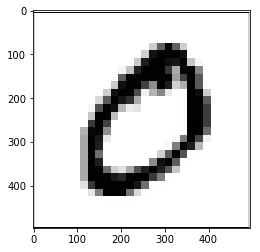

In [76]:
plt.imshow(img)

In [77]:
type(img)
img.shape
img = imresize(img, (28,28,3))
img.shape

(28, 28, 4)

In [78]:
def four2one(rgb):
    return np.dot(rgb[...,:4], [0.333, 0.333, 0.333,0])

In [79]:
gray = four2one(img)

In [80]:
gray.shape

(28, 28)

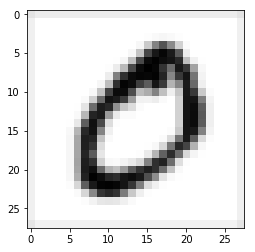

In [81]:
plt.imshow(gray,cmap = plt.get_cmap('gray'))

In [82]:
gray.shape

(28, 28)

In [83]:
gray /= 255

In [84]:
gray[0]

array([ 0.88930588,  0.92456471,  0.92456471,  0.92456471,  0.92456471,
        0.92456471,  0.92456471,  0.92456471,  0.92456471,  0.92456471,
        0.92456471,  0.92456471,  0.92456471,  0.92456471,  0.92456471,
        0.92456471,  0.92456471,  0.92456471,  0.92456471,  0.92456471,
        0.92456471,  0.92456471,  0.92456471,  0.92456471,  0.92456471,
        0.92456471,  0.92456471,  0.88930588])

In [85]:
import keras
from keras.models import load_model

In [86]:
model = load_model('model.h5')

In [87]:
gray.shape

(28, 28)

In [88]:
inputs = gray.reshape(1, 28, 28, 1)
inputs.shape

(1, 28, 28, 1)

In [90]:
model.predict_classes(inputs,batch_size=1, verbose=1)

1/1 [==============================] - 0s


array([3])